<h1><center>Fraudulent Transaction Detection Using Machine Learning Algorithms</center></h1>

# Indroduction To Fraudulent Transaction Detection

Financial organizations like banks and Forex service providers take several measures to protect thier customers' funds. Some of these measure may include verification of certain details when a customer tries to login to his/her bank account on a new device. For example, one may be asked a series of security questions when tried to login on a device that was never used before, to login.
<br>
<br>
Banks generally perform checks to ensure that a transaction is actually intended by the customer even after the required payment details provided are correct. Several parameters are used to declare the transaction fraudulent or non-fraudulent and this operation is crucial for customers to feel safe about their deposited funds in the banks. Some of the parameters that may be used by the banks for this classification are as follows:
1. Comparison between average and maximum amount spent over a certain period of time.
2. The last time the cerdit/debit card was used.
3. Place/location where the transaction was processed.
4. Beneficiary account details.

In this project, an implementation of fraudulent transaction detection system as been carried out. This is achieved using Machine Learning algorithms like Random forest classier and Logistic Regression along with a couple of other classifiers as will be seen in the sections that follow. Each following section consists of the implementation code along with detailed explanation where required. 

## Import the libraries

In [180]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, confusion_matrix 

## Reading the Dataset into a Pandas Dataframe

The dataset used is available for download at https://www.kaggle.com/mlg-ulb/creditcardfraud

In [181]:
dir_path='D:\\UniversityOfEssex\\MA336_AI'
folder_path='FinalProject\\Credit_Card_Fraud_Detection'
df = pd.read_csv(dir_path+'\\'+folder_path+'\\creditcard.csv')

# Drop the 'Time' column as it has no relevance 

df.drop('Time', axis = 1, inplace = True)

# Methods 

As it can be observed, the problem we have to solve falls in the category of classification. Given the details of a transaction, we are required to classify it as either a fraudulent or a non-fraudulent transaction. 

## EDA

Examining the first few records in out data.

In [182]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The independent variables here are the resultant variables on using PCA to reduce the dimensionality of data. Thus, the actual collected data might have been of a much higher dimensionality than the dimensionality that can be seen in our dataset. In order to maintain confidentiality of the transactions data, the exact feature names are not disclosed in the data and hence the feature names like V1, V2, etc.

Most of the variables (except 'Amount') are already scaled appropriately. Otherwise, we would scale the numerical features by standard deviation or normalize in order to speed up learning.


In [183]:
df.shape

(284807, 30)

The data available consists of 284807 records with information about 30 useful variables, one of which is the response variable. The variables from V1 to V28 are the resultant principal components on application of PCA to reduce the number of dimensions in the data.

# 

In [184]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

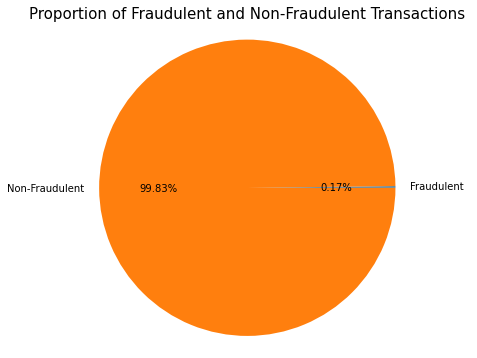

In [185]:
categories = 'Fraudulent', 'Non-Fraudulent'
counts = [df.Class[df['Class']==1].count(), df.Class[df['Class']==0].count()]
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(counts, labels=categories, autopct='%1.2f%%', startangle=0)
ax.axis('equal')
plt.title("Proportion of Fraudulent and Non-Fraudulent Transactions", size = 15)
plt.show()

In [186]:
round((df.Class.value_counts()[1]/df.Class.value_counts()[0])*100, 3)

0.173

'Class' is the response variable. We can see above, that the number of fraudulent cases is very less compared to that of the non-fraudulent cases (Just about 0.17% of the total cases). Hence, the dataset is highly imbalanced. 

This is true in general, the number of fraudulent transactions are seen less often than the non-fraudulent ones.

This means that accuracy is not a reliable evaluation metric.

# 

Amount involved in the transactions

<AxesSubplot:xlabel='Class', ylabel='Amount'>

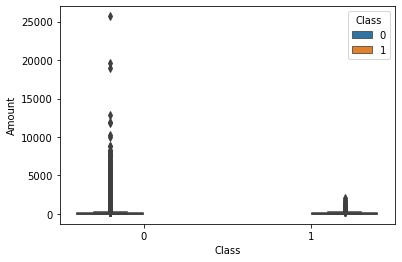

In [187]:
sns.boxplot(x = 'Class', y='Amount', hue = 'Class', data = df)

In [188]:
fraudulent_records = df.loc[df.Class == 1]
non_fraudulent_records = df.loc[df.Class == 0]

print('Summary statistics of Fraudulent transaction amount: ')
print('')
fraudulent_records['Amount'].describe()

Summary statistics of Fraudulent transaction amount: 



count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [189]:
print('Summary statistics of Non-Fraudulent transaction amount: ')
print('')
non_fraudulent_records['Amount'].describe()

Summary statistics of Non-Fraudulent transaction amount: 



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We observe that about three-fourths of the transactions were processed for low amounts of about USD105 or lesser in fraudulent transactions and about USD77 or lesser in case of non-fraudulent transactions. These can be noted from the third quartile (Q3) or 75-percentile value above.

Following cells provide a brief idea about the numerical variables that we'll deal with. The variables appear to be centered around the mean, or are in the similar range and hence we need not scale them by normalizing further.

In [190]:
fraudulent_records.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [191]:
non_fraudulent_records.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


Classification algorithms are supervised learning algorithms. The dataset is divided into learning parameters and response variables. Learning parameters (features) are the independent variables and response variables are the dependent variables that are influenced by the features.

# Preparing the training set and test set

Separate the independent and dependent variables.
<br>
X - Independent features
<br>
y - Dependent (response) variable

In [192]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

As seen previously, the dataset is highly imbalanced. The training and test sets need to be stratified in order to ensure that the training and test sets have same proportion of records associated to each label. Random division of an imbalanced dataset without stratification may result in having most of the training records associated with one label and the resultant model might not generalize well on our test data.
<br><br>
So, we make sure the split is stratified to get same proportion of records from each class in train and test set. This is achieved using the 'stratify' argument in the train_test_split() funtion.


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0, stratify=y)

In [194]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([227451,    394], dtype=int64))

In [195]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([56864,    98], dtype=int64))

In [196]:
394/227451

0.0017322412299792043

In [197]:
98/56864

0.0017234102419808666

Both train and test sets have 0.17% of the records belonging to the fraudulent category. Now that we have prepared our train and test data, we can 'feed' the training data and train models as desired. The trained model is then used to make predictions on the test data which the model has never 'seen'. The preictions are then used to evaluate against the actual labels in the test set.

# 

# Model Implementation

With the training and test sets ready, the classifier models are trained and evaluated. Following models are implemented with their default parameters.

- Decision Tree Classifier
- KNN Classifier
- Logistic Regression
- Random Forest Classifier

In the laster section, a grid search is implemented to tune the hyperparameters and obtain the best parameters by testing on an appropriate evaluation metric. Generally, ensemble methods like Random Forest tends to work well when we have a large dataset, however it might be significantly time consuming in such case. 

<br>
<br>
We need to take precision and recall into account to get a reliable metric for evaluation of our models. Accuracy is not reliable when the dataset is imbalanced. 
<br>
<br>
F1-Score is used as the metric for evaluation as it takes precision and recall into account. F1-Score is the harmonic mean of precision and recall.

## Decision Tree Classifier

In [198]:
# Decision Tree Classifier
decision_tree_cls = DecisionTreeClassifier(max_depth = 4, 
                                           criterion = 'entropy')
decision_tree_cls.fit(X_train, y_train)
decision_tree_pred = decision_tree_cls.predict(X_test)

In [199]:
print('Accuracy obtained by decision tree classifier :', 
      round(accuracy_score(y_test, decision_tree_pred)*100,3), '%')

Accuracy obtained by decision tree classifier : 99.928 %


In [200]:
print('F1-score obtained by decision tree classifier :', 
      round(f1_score(y_test, decision_tree_pred)*100,3), '%')

F1-score obtained by decision tree classifier : 76.023 %


## K-Nearest Neighbours Classifier

In [201]:
# KNN Classifier
n = 5
knn_cls = KNeighborsClassifier(n_neighbors = n)
knn_cls.fit(X_train, y_train)
knn_pred = knn_cls.predict(X_test)

In [202]:
print('Accuracy obtained by KNN classifier :', 
      round(accuracy_score(y_test, knn_pred)*100,3), '%')

Accuracy obtained by KNN classifier : 99.923 %


In [203]:
print('F1-score obtained by KNN classifier :', 
      round(f1_score(y_test, knn_pred)*100,3), '%')

F1-score obtained by KNN classifier : 72.5 %


## Logistic Regression

In [204]:
# Logistic Regression 
logistic_reg_cls = LogisticRegression()
logistic_reg_cls.fit(X_train, y_train)
logistic_reg_pred = logistic_reg_cls.predict(X_test)

E:\Anaconda_Directory\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
log_acc=accuracy_score(y_test, logistic_reg_pred)
log_acc

0.9991397773954567

In [206]:
log_f1=f1_score(y_test, logistic_reg_pred)
log_f1

0.703030303030303

In [207]:
print('Accuracy obtained by Logistic Regression :', 
      round(accuracy_score(y_test, logistic_reg_pred)*100,3), '%')

Accuracy obtained by Logistic Regression : 99.914 %


In [208]:
print('F1-score obtained by Logistic Regression :', 
      round(f1_score(y_test, logistic_reg_pred)*100,3), '%')

F1-score obtained by Logistic Regression : 70.303 %


## Random Forest Classifier

In [209]:
# Random Forest Classifier
random_forest_cls = RandomForestClassifier(max_depth = 4)
random_forest_cls.fit(X_train, y_train)
random_forest__pred = random_forest_cls.predict(X_test)

In [210]:
print('Accuracy obtained by Random Forest Classifier :', 
      round(accuracy_score(y_test, random_forest__pred)*100,3), '%')

Accuracy obtained by Random Forest Classifier : 99.921 %


In [211]:
print('F1-score obtained by Random Forest Classifier :', 
      round(f1_score(y_test, random_forest__pred)*100,3), '%')

F1-score obtained by Random Forest Classifier : 72.393 %


In the models above, although the accuracy obtained is very high (more than 99%), we must note that 99.83% of our data is constituted by a records associated with just one label. So, in the worst case of our model performance, even if it predicts all the records as non-fraudulent, we will still get an accuracy of 99.83%, but that would not be a good predictive model.
<br>
<br>
To evaluate our model keeping this in mind, precision and recall are considered in evaluation. 
<br>
<br>
In our case, precision gives a quantified measure of number of fraudulent labelled predictions that were actually fraudulent. Recall gives a quantified measure of number of correct fraudulent predictions out of all the actually fraudulent predictions.
<br>
<br>
$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

Where, <br> TP : True Positives<br>
        FP : False Positives<br>
        FN : False Negatives
        
<br>
<br>
There is a trade-off between precision and recall. A high precision will result in a low recall and vice-versa. F1-score is a single metric that combines both precision and recall. 
<br><br>
$$F1 = \frac{2*Precision*Recall}{Precision + Recall}$$


# 

## Grid Search to find best hyperparameters for the models

We make use of F1-score as the evaluation metric. Since we have binary targets, in grid search, we set the parameter 'scoring' to 'f1' in order to find the best model in terms of resultant f1-score rather than accuracy. 
<br><br>
We implement Grid Search  on Decision Trees, KNN and Random Forest classifiers where we have more parameters to tune than Logistic Regression and better results can be obtained.

## Grid search on Decision Tree Classifier

In [212]:
dt=DecisionTreeClassifier()

dt_grid_params={
    'criterion':['entropy'],
    'max_depth':[4, 6],
    'min_samples_split':[2, 4]
}

dt_grid = GridSearchCV(dt, dt_grid_params, scoring='f1')
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 6],
                         'min_samples_split': [2, 4]},
             scoring='f1')

In [213]:
print('Best parameters :', dt_grid.best_params_)
dt_grid_pred=dt_grid.predict(X_test)

Best parameters : {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4}


In [214]:
dt_f1=f1_score(y_test, dt_grid_pred)
dt_f1

0.8089887640449438

In [215]:
dt_acc=accuracy_score(y_test, dt_grid_pred)
dt_acc

0.999403110845827

In [216]:
dt_mat = confusion_matrix(y_test, dt_grid_pred, labels = [0, 1])
dt_mat

array([[56856,     8],
       [   26,    72]], dtype=int64)

Confusion Matrix for Decision Trees Classifier :


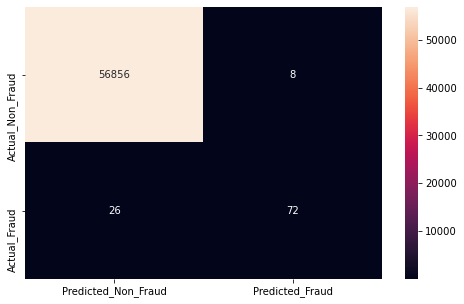

In [217]:
print('Confusion Matrix for Decision Trees Classifier :')
plt.figure(figsize=(8,5))
dt_mat_df=pd.DataFrame(dt_mat, columns=['Predicted_Non_Fraud', 'Predicted_Fraud'], 
             index=['Actual_Non_Fraud', 'Actual_Fraud'])
sns.heatmap(dt_mat_df, annot=True, fmt='g')
plt.savefig('DecisionTree_ConfusionMatrix.png')

## Grid search on K-Nearest Neighbours Classifier

In [218]:
knn_classifier=KNeighborsClassifier()

knn_grid_params={
    'n_neighbors':[2, 5, 6]
}

knn_grid = GridSearchCV(knn_classifier, knn_grid_params, scoring='f1')
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 6]}, scoring='f1')

In [219]:
print('Best parameters :', knn_grid.best_params_)
knn_grid_pred=knn_grid.predict(X_test)

Best parameters : {'n_neighbors': 5}


In [220]:
knn_f1=f1_score(y_test, knn_grid_pred)
knn_f1

0.7249999999999999

In [221]:
knn_acc=accuracy_score(y_test, knn_grid_pred)
knn_acc

0.9992275552122467

In [222]:
knn_mat = confusion_matrix(y_test, knn_grid_pred, labels = [0, 1])
knn_mat

array([[56860,     4],
       [   40,    58]], dtype=int64)

Confusion Matrix for KNN Classifier :


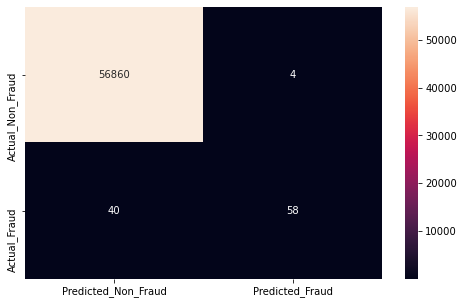

In [223]:
print('Confusion Matrix for KNN Classifier :')
plt.figure(figsize=(8,5))
knn_mat_df=pd.DataFrame(knn_mat, columns=['Predicted_Non_Fraud', 'Predicted_Fraud'], 
             index=['Actual_Non_Fraud', 'Actual_Fraud'])
sns.heatmap(knn_mat_df, annot=True, fmt='g')
plt.savefig('KNN_ConfusionMatrix.png')

## Grid search on Random Forest Classifier

In [224]:
rf_classifier=RandomForestClassifier()

rf_grid_params={
    'n_estimators':[100, 150],
    'criterion':['entropy'],
    'max_depth':[12, 16]
}

rf_grid = GridSearchCV(rf_classifier, rf_grid_params, scoring='f1')
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [12, 16],
                         'n_estimators': [100, 150]},
             scoring='f1')

In [225]:
print('Best Parameters :', rf_grid.best_params_)
rf_grid_pred=rf_grid.predict(X_test)

Best Parameters : {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 100}


In [226]:
rf_f1=f1_score(y_test, rf_grid_pred)
rf_f1

0.8255813953488371

In [227]:
rf_acc=accuracy_score(y_test, rf_grid_pred)
rf_acc

0.9994733330992591

In [228]:
rf_mat = confusion_matrix(y_test, rf_grid_pred, labels = [0, 1])
rf_mat

array([[56861,     3],
       [   27,    71]], dtype=int64)

Confusion Matrix for Random Forest Classifier :


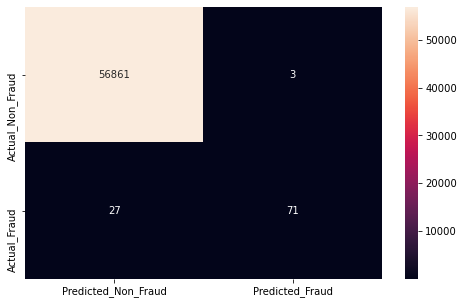

In [229]:
print('Confusion Matrix for Random Forest Classifier :')
plt.figure(figsize=(8,5))
rf_mat_df=pd.DataFrame(rf_mat, columns=['Predicted_Non_Fraud', 'Predicted_Fraud'], 
             index=['Actual_Non_Fraud', 'Actual_Fraud'])
sns.heatmap(rf_mat_df, annot=True, fmt='g')
plt.savefig('RandomForest_ConfusionMatrix.png')

# Results

## Choosing the best performing model

From the above results, it can be noted that the tuned Random Forest Classifier with certain hyperparameters is the best performing model. The result obtained using decision tree classifier is also acceptable and close to the metric value achieved by the Random Forest Classifier.
<br>
<br>
As stated in the previous section, accuracy is not a reliable metric in this case due to the imbalanced dataset. Best model is the one that obtains best F1-Score on the test set. 
<br>
<br>
The parameters of the best model (Random Forest) are as follows:

In [230]:
print('Best Parameters for Random Forest Classifier: ', rf_grid.best_params_)

Best Parameters for Random Forest Classifier:  {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 100}


In [231]:
print('The F1-Score obtained by the model on test set :', 
      round(f1_score(y_test, rf_grid.predict(X_test))*100,3), '%')

The F1-Score obtained by the model on test set : 82.558 %


In [232]:
rf_grid_pred=rf_grid.predict(X_test)

In [233]:
print('Confusion Matrix Obtained :')
conf_mat=pd.DataFrame(confusion_matrix(y_test, rf_grid_pred), 
             columns=['Predicted_Non_Fraud', 'Predicted_Fraud'], 
             index=['Actual_Non_Fraud', 'Actual_Fraud'])
conf_mat

Confusion Matrix Obtained :


,Predicted_Non_Fraud,Predicted_Fraud
Actual_Non_Fraud,56861,3
Actual_Fraud,27,71


Confusion Matrix for Random Forest Classifier :


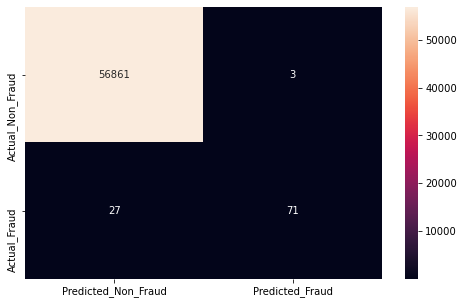

In [234]:
print('Confusion Matrix for Random Forest Classifier :')
plt.figure(figsize=(8,5))
rf_mat_df=pd.DataFrame(rf_mat, columns=['Predicted_Non_Fraud', 'Predicted_Fraud'], 
             index=['Actual_Non_Fraud', 'Actual_Fraud'])
sns.heatmap(rf_mat_df, annot=True, fmt='g')
plt.savefig('RandomForest_ConfusionMatrix.png')

Some of the predicted labels against actual labels are as follows.

In [235]:
print('Predicted :',rf_grid_pred[1845:1850])
print('Actual Labels :',y_test[1845:1850])

Predicted : [0 0 1 0 0]
Actual Labels : [0 0 1 0 0]


To predict the result on a single transaction, the array of parameters of the transaction need to be passed in the form of a 2-D array to the predict() method of our model.
<br>
<br>
The predict() method takes 2-D array as the argument.

In [236]:
print('True Category :', y_test[0])
print('Predicted Category :', rf_grid.predict([X_test[0]]))

True Category : 0
Predicted Category : [0]


In [237]:
print('True Categories :', y_test[5], y_test[1847])
print('Predicted Categories :', rf_grid.predict([X_test[5], X_test[1847]]))

True Categories : 0 1
Predicted Categories : [0 1]


# Conclusion

For this particular problem, random forest classifier was the chosen model as a significantly higher f1-score was obtained when compared to the other algorithms implemented. Random Forest Classifiers generally perform better when the dataset under consideration has a large number of dimensions. Ensemble methods are reliable and generalize better and minimize the chances of overfitting. This was observed in the implementation carried out. 
<br><br>
F1-score of around 83% by Random Forest indicates an acceptable level of performance while the classifier implemented using Decision Trees also performs decently with an F1-score around 80%.
<br><br>
To summarize, following are the conclusive results obtained.

In [238]:
pd.DataFrame({'Model': ['Decision Trees', 'KNN', 'Logistic Regression', 'Random Forest'], 
              'Highest Accuracy (%)': [round(dt_acc*100,3), round(knn_acc*100,3), 
                                       round(log_acc*100,3), round(rf_acc*100,3)],
             'Highest F1-Score (%)': [round(dt_f1*100,3), round(knn_f1*100,3), 
                                       round(log_f1*100,3), round(rf_f1*100,3)]},
            ).set_index('Model')

,Highest Accuracy (%),Highest F1-Score (%)
Model,,
Decision Trees,99.940,80.899
KNN,99.923,72.500
Logistic Regression,99.914,70.303
Random Forest,99.947,82.558
